<a href="https://colab.research.google.com/github/Shkum/IT_STEP/blob/ML/module3/practice_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [685]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
import lightgbm as lgb

Дані про продаж будинків

In [686]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/AmesHousing.csv",
                 index_col=0)

In [687]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [688]:
df.columns = df.columns.str.lower()


In [689]:
df.head()

,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,utilities,...,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,sale condition,saleprice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [690]:
df['saleprice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: saleprice, dtype: float64

# Завдання 1
Розділіть дані на тестові та тренувальні(цільова ознака `SalePrice`)

In [691]:
y = df['saleprice']
X = df.drop(columns='saleprice')

In [692]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

# Завдання 2
Змініть тип категоріальних даних на `category`

In [693]:
cat_columns = X.select_dtypes(include="object").columns
X[cat_columns] = X[cat_columns].astype('category')

# Завдання 3
Створіть препроцесор для заповнення пропусків та натренуйте його

In [694]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [695]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="category").columns

cat_columns = []

num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))])

cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")), ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),])

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['pid', 'ms subclass', 'lot frontage', 'lot area', 'overall qual',
       'overall cond', 'year built', 'year remod/add', 'mas vnr area',
       'bsmtfin sf 1', 'bsmtfin sf 2', 'bsmt unf sf', 'total bsmt sf',
       '1st flr sf', '2nd flr sf', 'low qual fin sf', 'gr liv area',
       'bsmt full bath', 'bsmt half bath', 'full bath', 'half bath',
       'bedroom abvgr', 'kitchen abvgr', 'totrms abvgrd', 'fireplaces',
       'garage yr blt', 'garage cars', 'garage area', 'wood deck sf',
       'open porch sf', 'enclosed porch', '3ssn porch', 'screen porch',
       'pool area', 'misc val', 'mo sold', 'yr sold'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

In [696]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Завдання 4
Створіть модель та натренуйте її

In [697]:
model = lgb.LGBMRegressor(objective='mse', max_depth=50, learning_rate=0.02, n_estimators=250 )

In [698]:
model.fit(X_train, y_train,
          eval_set=[(X_test, y_test), (X_train, y_train)],
          eval_names = ['train', 'test'],
          eval_metric='mae')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3683
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 36
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 178582.207765


LGBMRegressor(learning_rate=0.02, max_depth=50, n_estimators=250,
              objective='mse')

# Завдання 5
Виведіть метрики, важливість онак та графік метрик на тренувальних та тестових даних

In [699]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [700]:

all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,train,test
MAE,9717.75,15724.66
RMSE,15280.44,26853.82
R2,0.96,0.91


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

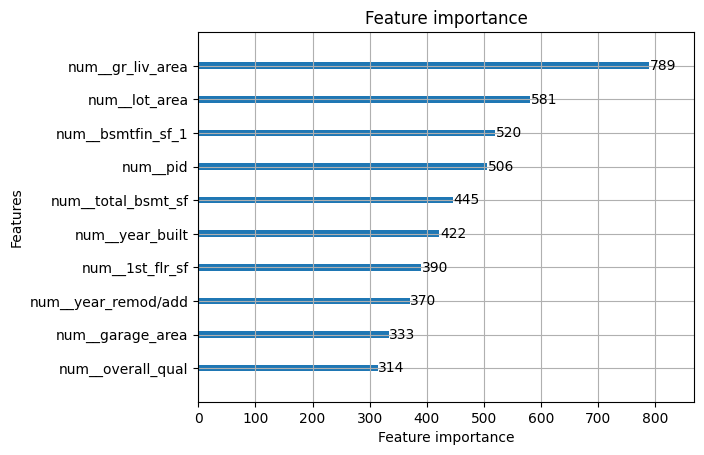

In [701]:

lgb.plot_importance(model, max_num_features=10)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

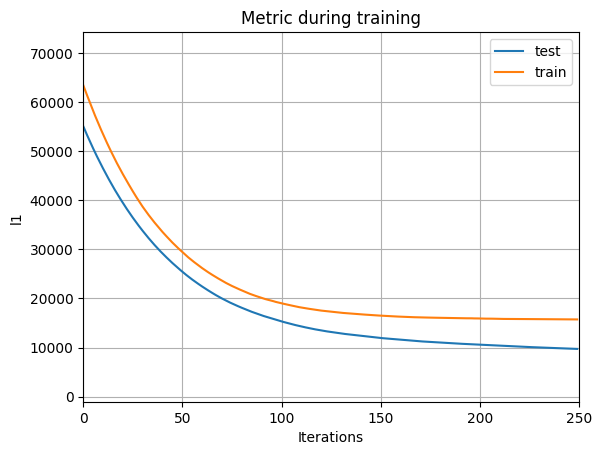

In [702]:
lgb.plot_metric(model,
                metric='l1')

# Завдання 6
Об'єднайте препроцесор та натреновану модель і збережіть її

In [703]:
model = Pipeline(
    [("prep", preprocessor),
     ("model", model)
     ]
)

model


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pid', 'ms subclass', 'lot frontage', 'lot area', 'overall qual',
       'overall cond', 'year built', 'year remod/add', 'mas vnr area',
       'bsmtfin sf 1', 'bsmtfin sf 2', 'bsmt unf sf', 'total bsmt sf',
       '1st flr sf', '2nd flr sf', 'low qual fin sf', 'gr liv area',
       'bsm...
       'bedroom abvgr', 'kitchen abvgr', 'totrms abvgrd', 'fireplaces',
       'garage yr blt', 'garage cars', 'garage area', 'wood deck sf',
       'open porch sf', 'enclosed porch', '3ssn porch', 'screen porch',
       'pool area', 'misc val', 'mo sold', 'yr sold'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('model',
                 LGBMRegressor(learning_rate=0.02, max_depth=50,
                               n_estimators=250, objective='mse'))])

In [704]:

import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [705]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pid', 'ms subclass', 'lot frontage', 'lot area', 'overall qual',
       'overall cond', 'year built', 'year remod/add', 'mas vnr area',
       'bsmtfin sf 1', 'bsmtfin sf 2', 'bsmt unf sf', 'total bsmt sf',
       '1st flr sf', '2nd flr sf', 'low qual fin sf', 'gr liv area',
       'bsm...
       'bedroom abvgr', 'kitchen abvgr', 'totrms abvgrd', 'fireplaces',
       'garage yr blt', 'garage cars', 'garage area', 'wood deck sf',
       'open porch sf', 'enclosed porch', '3ssn porch', 'screen porch',
       'pool area', 'misc val', 'mo sold', 'yr sold'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('model',
                 LGBMRegressor(learning_rate=0.02, max_depth=50,
                               n_estimators=250, objective='mse'))])